In [73]:
import numpy as np
import pandas as pd
from collections import defaultdict
import nltk
import re
import random
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('omw-1.4')
nltk.download('treebank')
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import treebank
import string
from nltk import bigrams, FreqDist, ConditionalFreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
from matplotlib import pyplot as plt
from nltk import HiddenMarkovModelTagger

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prakash.prasad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prakash.prasad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prakash.prasad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/prakash.prasad/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/prakash.prasad/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prakash.prasad/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /

In [2]:
df = pd.read_csv('Coursera_reviews.csv')
print(df.shape)
df.head()

(1048309, 5)


,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training


In [3]:
# working with a sample to start with, comment this out later
# df1 = df.dropna(subset=['reviews']).copy()
df1 = df.dropna(subset=['reviews']).iloc[0:100].copy()
df1.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training


In [4]:
def preprocess_text(text):
    # Remove punctuations
    try:
        text = text.translate(str.maketrans('', '', string.punctuation))
    except:
        text = ['majorissue']
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])

    # Remove special characters with space
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase and tokenize and remove stopwords
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)  # rejoin to make a string

df1['clean_reviews'] = df1['reviews'].apply(preprocess_text)
df1.head()


,reviews,reviewers,date_reviews,rating,course_id,clean_reviews
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training,pretty dry able pass two complete watches im h...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training,would better experience video screen shots wou...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training,information perfect program little annoying wa...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training,grammatical mistakes test made double take bad
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training,excellent course training provided detailed ea...


In [5]:
df1[df1['clean_reviews'] == 'majorissue'].head()  # check if there has been any issue with tagging

,reviews,reviewers,date_reviews,rating,course_id,clean_reviews


In [6]:
print('Sample change before and after cleaning')
print(df1.iloc[0:1]['reviews'])
print('\n')
print(df1.iloc[0:1]['clean_reviews'])

Sample change before and after cleaning
0    Pretty dry, but I was able to pass with just t...
Name: reviews, dtype: object


0    pretty dry able pass two complete watches im h...
Name: clean_reviews, dtype: object


In [11]:
ps = PorterStemmer()
lm = WordNetLemmatizer()

def apply_stemmer_lemmetizer(text):
    words = word_tokenize(text)  # tokenising given string
    stemmed_words = [ps.stem(word) for word in words]  # stemming given string
    lemmatised_words = [lm.lemmatize(word) for word in stemmed_words]
    return ' '.join(lemmatised_words)  # rejoin to make a string

df1['lemmatised_reviews'] = df1['clean_reviews'].apply(apply_stemmer_lemmetizer)
df1.head()



,reviews,reviewers,date_reviews,rating,course_id,clean_reviews,lemmatised_reviews
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training,pretty dry able pass two complete watches im h...,pretti dri abl pas two complet watch im happi ...
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training,would better experience video screen shots wou...,would better experi video screen shot would sh...
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training,information perfect program little annoying wa...,inform perfect program littl annoy wait minut ...
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training,grammatical mistakes test made double take bad,grammat mistak test made doubl take bad
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training,excellent course training provided detailed ea...,excel cours train provid detail easi follow


In [12]:
print('Sample change before and after lemmitisation')
print(df1.iloc[0:1]['clean_reviews'])
print('\n')
print(df1.iloc[0:1]['lemmatised_reviews'])

Sample change before and after lemmitisation
0    pretty dry able pass two complete watches im h...
Name: clean_reviews, dtype: object


0    pretti dri abl pas two complet watch im happi ...
Name: lemmatised_reviews, dtype: object


In [13]:
# uncomment to improve efficiency in large datasets
# df1.drop('clean_reviews', axis=1, inplace=True)

In [14]:
def pos_tagging(text):
    tokens = word_tokenize(text)
    tags = nltk.pos_tag(tokens)
    return tags

df1['pos_tags'] = df1['lemmatised_reviews'].apply(pos_tagging)
df1.head()

,reviews,reviewers,date_reviews,rating,course_id,clean_reviews,lemmatised_reviews,pos_tags
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4.0,google-cbrs-cpi-training,pretty dry able pass two complete watches im h...,pretti dri abl pas two complet watch im happi ...,"[(pretti, NNS), (dri, VBP), (abl, JJ), (pas, N..."
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4.0,google-cbrs-cpi-training,would better experience video screen shots wou...,would better experi video screen shot would sh...,"[(would, MD), (better, VB), (experi, VB), (vid..."
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4.0,google-cbrs-cpi-training,information perfect program little annoying wa...,inform perfect program littl annoy wait minut ...,"[(inform, NN), (perfect, JJ), (program, NN), (..."
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4.0,google-cbrs-cpi-training,grammatical mistakes test made double take bad,grammat mistak test made doubl take bad,"[(grammat, NN), (mistak, NN), (test, NN), (mad..."
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4.0,google-cbrs-cpi-training,excellent course training provided detailed ea...,excel cours train provid detail easi follow,"[(excel, NN), (cours, NNS), (train, VBP), (pro..."


In [15]:
hardcoded_pos_def = {'CC': 'conjunction, coordinating',
                     'CD': 'numeral, cardinal',
                     'DT': 'determiner',
                     'EX': 'existential there',
                     'FW': 'foreign word',
                     'IN': 'preposition or conjunction, subordinating',
                     'JJ': 'adjective or numeral, ordinal',
                     'JJR': 'adjective, comparative',
                     'JJS': 'adjective, superlative',
                     'LS': 'list item marker',
                     'MD': 'modal auxiliary',
                     'NN': 'noun, common, singular or mass',
                     'NNP': 'noun, proper, singular',
                     'NNPS': 'noun, proper, plural',
                     'NNS': 'noun, common, plural',
                     'PDT': 'pre-determiner',
                     'POS': 'genitive marker',
                     'PRP': 'pronoun, personal',
                     'PRP$': 'pronoun, possessive',
                     'RB': 'adverb',
                     'RBR': 'adverb, comparative',
                     'RBS': 'adverb, superlative',
                     'RP': 'particle',
                     'SYM': 'symbol',
                     'TO': '"to" as preposition or infinitive marker',
                     'UH': 'interjection',
                     'VB': 'verb, base form',
                     'VBD': 'verb, past tense',
                     'VBG': 'verb, present participle or gerund',
                     'VBN': 'verb, past participle',
                     'VBP': 'verb, present tense, not 3rd person singular',
                     'VBZ': 'verb, present tense, 3rd person singular',
                     'WDT': 'WH-determiner',
                     'WP': 'WH-pronoun',
                     'WP$': 'WH-pronoun, possessive',
                     'WRB': 'Wh-adverb'}

In [30]:
count_dict = defaultdict(lambda: 0)
for row in df1['pos_tags']:
    for _, key in row:
        count_dict[key] += 1

counts_dict_final = dict(count_dict)
counts_dict_df_ = pd.DataFrame(list(counts_dict_final.items()), columns=['pos_tags', 'occurrence_counts'])
pos_def_df = pd.DataFrame(list(hardcoded_pos_def.items()), columns=['pos_tags', 'tag_definition'])

counts_dict_df = pd.merge(counts_dict_df_, pos_def_df, on='pos_tags', how='left')

N_max = counts_dict_df.shape[0]
print('Total pos tags in data : {}'.format(N_max))

Total pos tags in data : 18


In [31]:
N = int(input("Enter N for looking at top n pos tags, max N {}: ".format(N_max)))
assert N<=N_max, 'Enter valid N <= N_max'

counts_dict_df = counts_dict_df[['pos_tags', 'tag_definition', 'occurrence_counts']]
counts_dict_df = counts_dict_df.sort_values(by='occurrence_counts', ascending=False)
counts_dict_df.head(N)


,pos_tags,tag_definition,occurrence_counts
3,NN,"noun, common, singular or mass",509
2,JJ,"adjective or numeral, ordinal",214
1,VBP,"verb, present tense, not 3rd person singular",96
0,NNS,"noun, common, plural",91
5,RB,adverb,74
9,VB,"verb, base form",38
10,IN,"preposition or conjunction, subordinating",20
12,VBD,"verb, past tense",14


4. display frequency count and percentage of each tag in top N list

In [32]:
top_n_pos_tags_df = counts_dict_df.nlargest(N, 'occurrence_counts')
counts_ = counts_dict_df['occurrence_counts'].sum()
top_n_pos_tags_df['percent_coverage'] = (top_n_pos_tags_df['occurrence_counts'] / counts_) * 100
top_n_pos_tags_df.head()

,pos_tags,tag_definition,occurrence_counts,percent_coverage
3,NN,"noun, common, singular or mass",509,46.188748
2,JJ,"adjective or numeral, ordinal",214,19.419238
1,VBP,"verb, present tense, not 3rd person singular",96,8.711434
0,NNS,"noun, common, plural",91,8.257713
5,RB,adverb,74,6.715064


5. Generate visualisations for pos tags frequency counts 1 mark

Text(0.5, 1.0, 'Pos tags frequency counts')

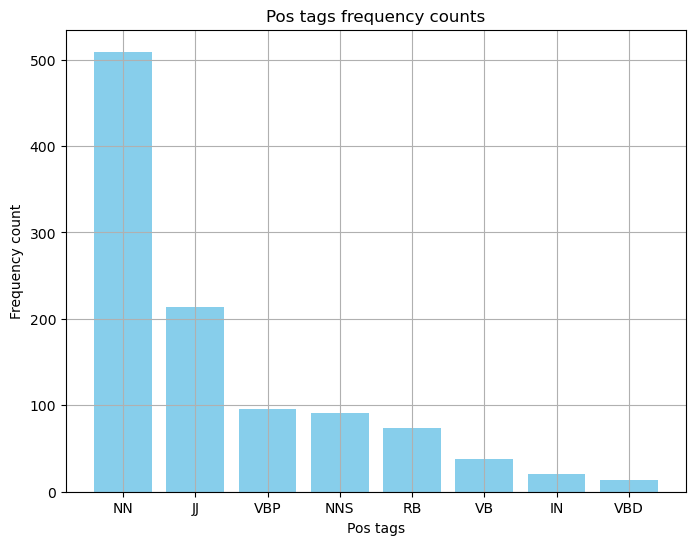

In [36]:
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.bar(top_n_pos_tags_df['pos_tags'], top_n_pos_tags_df['occurrence_counts'], color='skyblue')

plt.xlabel('Pos tags')
plt.ylabel('Frequency count')
plt.grid()
plt.title('Pos tags frequency counts')

6. Display HMM pos tags on first 4 rows of dataset

In [50]:
# we will test on first 4 rows and train on the rest
train_data = df1.iloc[4:]['pos_tags']
test_data = df1.iloc[:4]['lemmatised_reviews']

train_data.shape, test_data.shape

((96,), (4,))

In [78]:
list(test_data)[2]

'inform perfect program littl annoy wait minut watch video take quiz inform perfect pas test issu'

In [62]:
list(train_data)[19]

[('easi', 'RB'), ('follow', 'VB'), ('along', 'RB'), ('understand', 'NN')]

In [68]:
tagged_sentences = treebank.tagged_sents()
tmp = tagged_sentences[:5]
tmp[5]

IndexError: list index out of range

In [94]:
# training hmm model
hmm_tagger = HiddenMarkovModelTagger.train(list(train_data))
#predictions
tagged_token_list = []
for tokens_ in list(test_data):
    index = len(tagged_token_list)
    print('for index {} , HMM o/p: '.format(index))
    tokens = word_tokenize(tokens_)
    tagged_tokens = hmm_tagger.tag(tokens)
    tagged_token_list.append(tagged_tokens)
    print(tagged_tokens)
    print('nltk pretrained model o/p')
    print(df1.iloc[index]['pos_tags'])
    print('\n')

# tagged_tokens = hmm_tagger.tag(list(test_data))
# 
# print(*tagged_tokens, sep='\n')

for index 0 , HMM o/p: 
[('pretti', 'NNP'), ('dri', ','), ('abl', 'CD'), ('pas', 'NNS'), ('two', 'VBD'), ('complet', '-NONE-'), ('watch', 'TO'), ('im', 'PRP'), ('happi', 'VBZ'), ('usual', 'VBN'), ('question', '-NONE-'), ('final', 'TO'), ('exam', 'PRP'), ('cours', 'VBZ'), ('annoy', 'VBN'), ('far', '-NONE-'), ('better', 'TO'), ('mani', 'PRP'), ('microsoft', 'VBZ'), ('test', 'VBN'), ('taken', '-NONE-'), ('never', 'TO'), ('found', 'PRP'), ('supliment', 'VBZ'), ('materi', 'VBN'), ('cours', '-NONE-'), ('refer', 'TO'), ('care', 'PRP'), ('pas', 'RBR')]
nltk pretrained model o/p
[('pretti', 'NNS'), ('dri', 'VBP'), ('abl', 'JJ'), ('pas', 'NN'), ('two', 'CD'), ('complet', 'NN'), ('watch', 'NN'), ('im', 'NN'), ('happi', 'VBP'), ('usual', 'JJ'), ('question', 'NN'), ('final', 'JJ'), ('exam', 'NN'), ('cours', 'NNS'), ('annoy', 'VBP'), ('far', 'RB'), ('better', 'JJR'), ('mani', 'NN'), ('microsoft', 'JJ'), ('test', 'NN'), ('taken', 'VBN'), ('never', 'RB'), ('found', 'VBN'), ('supliment', 'NN'), ('mater